# Create water occurrence image from yearly satellite images

*Written by Men Vuthy, 2022*

---





### Objective



*   The objective is to create a water occurrence image from Landsat and Sentinel satellite images. The data contains multiple images of dry season in different years.



Data folder:

![img](img-markdown/dataset.png "Title")

### Installation

In [1]:
!pip install geopandas
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Code

In [2]:
cd /content/drive/MyDrive/Colab Notebooks/cheata

/content/drive/MyDrive/Colab Notebooks/cheata


In [3]:
# Import all necessary modules
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import rasterio
import geopandas as gpd

In [4]:
# Read data
# File and folder paths
file_path = "tiff"

# Make a search criteria to select the ndvi files
q = os.path.join(file_path, "*.tif")

# sorted files by name
paths = sorted(glob.glob(q)) 

paths

['tiff/201003051.tif',
 'tiff/201102041.tif',
 'tiff/201202071.tif',
 'tiff/201302251.tif',
 'tiff/201403241.tif',
 'tiff/201502071.tif',
 'tiff/201604091.tif',
 'tiff/201703151.tif',
 'tiff/201803101.tif',
 'tiff/201902131.tif',
 'tiff/202003091.tif']

In [5]:
# Open all files in folder
image_source = []

for file in paths:
    image = rasterio.open(file)
    image_source.append(image)

image_source

[<open DatasetReader name='tiff/201003051.tif' mode='r'>,
 <open DatasetReader name='tiff/201102041.tif' mode='r'>,
 <open DatasetReader name='tiff/201202071.tif' mode='r'>,
 <open DatasetReader name='tiff/201302251.tif' mode='r'>,
 <open DatasetReader name='tiff/201403241.tif' mode='r'>,
 <open DatasetReader name='tiff/201502071.tif' mode='r'>,
 <open DatasetReader name='tiff/201604091.tif' mode='r'>,
 <open DatasetReader name='tiff/201703151.tif' mode='r'>,
 <open DatasetReader name='tiff/201803101.tif' mode='r'>,
 <open DatasetReader name='tiff/201902131.tif' mode='r'>,
 <open DatasetReader name='tiff/202003091.tif' mode='r'>]

**Create water occurrence for Landsat images**

In [6]:
image_binary_landsat = []

for i in range(len(image_source)-5):
  # read all image into numpy array
  img = image_source[i].read()

  # make binary image, 0=no water, 1= water
  img_binary = np.where(img != 0, 1, img)

  # Append to list
  image_binary_landsat.append(img_binary)

# Sum array to create water occurrence
landsat = sum(image_binary_landsat)

*Visualize result*

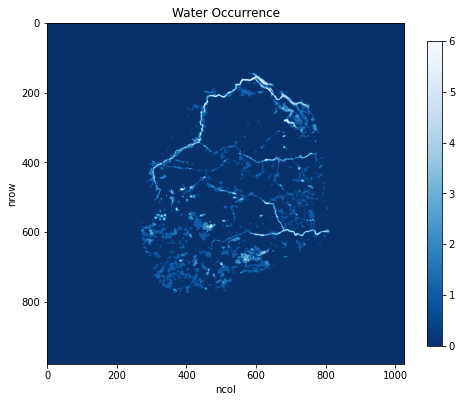

In [7]:
# Plot result
fig, ax = plt.subplots(figsize=(8, 8))
wat_occ = ax.imshow(landsat[0], cmap='Blues_r')
fig.colorbar(wat_occ, ax=ax, anchor=(0, 0.3), shrink=0.7)

ax.set_title('Water Occurrence')
ax.set_xlabel('ncol')
ax.set_ylabel('nrow')

plt.show();

*Export result as GeoTiff*

In [8]:
# Data dir
data_dir = "output"

# Output raster
out_tif = os.path.join(data_dir, "landsat_water_occurrence.tif")

# Copy the metadata
out_meta = image_source[0].meta.copy()
out_meta

# Update the metadata
out_meta.update({'driver': 'GTiff',
                 'dtype': 'uint16',
                 'nodata': 0.0,
                 'width': landsat.shape[2],
                 'height': landsat.shape[1],
                 'crs': image_source[0].crs,
                 'count':1,
                 'transform': image_source[0].transform
                })

with rasterio.open(out_tif, "w", **out_meta) as dest:
    dest.write(landsat.astype('uint16'))

**Create water occurrence for Sentinel images**

In [9]:
image_binary_sentinel = []

for i in range(6, len(image_source)):
  # read all image into numpy array
  img = image_source[i].read()

  # make binary image, 0=no water, 1= water
  img_binary = np.where(img == 10 , 0, img)
  img_binary = np.where(img_binary != 0, 1, img_binary)

  # Append to list
  image_binary_sentinel.append(img_binary)

# Sum array to create water occurrence
sentinel = sum(image_binary_sentinel)

*Visualize result*

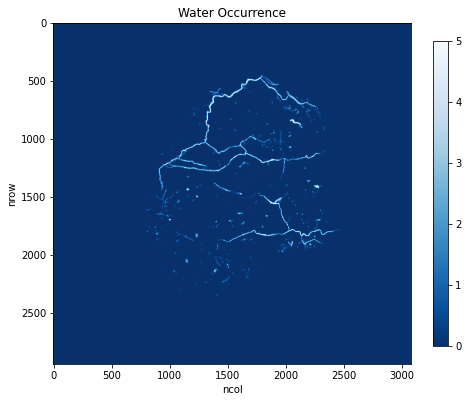

In [10]:
# Plot result
fig, ax = plt.subplots(figsize=(8, 8))
wat_occ = ax.imshow(sentinel[0], cmap='Blues_r')
fig.colorbar(wat_occ, ax=ax, anchor=(0, 0.3), shrink=0.7)

ax.set_title('Water Occurrence')
ax.set_xlabel('ncol')
ax.set_ylabel('nrow')

plt.show();

*Export result as GeoTiff*

In [11]:
# Data dir
data_dir = "output"

# Output raster
out_tif = os.path.join(data_dir, "sentinel_water_occurrence.tif")

# Copy the metadata
out_meta = image_source[8].meta.copy()
out_meta

# Update the metadata
out_meta.update({'driver': 'GTiff',
                 'dtype': 'uint16',
                 'nodata': 0.0,
                 'width': sentinel.shape[2],
                 'height': sentinel.shape[1],
                 'crs': image_source[8].crs,
                 'count':1,
                 'transform': image_source[8].transform
                })

with rasterio.open(out_tif, "w", **out_meta) as dest:
    dest.write(sentinel.astype('uint16'))